          Class 1  Class 2  Class 3
Survived      136       87      119
Dead           80       97      372


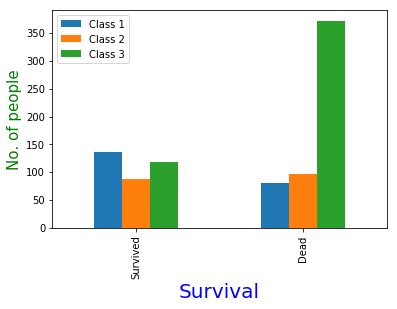

Percentage of Class1 passenger survived is  63.0 %
Percentage of Class2 passenger survived is  47.0 %
Percentage of Class3 passenger survived is  24.0 %
        Survived  Dead
Female       233   109
Male          81   468


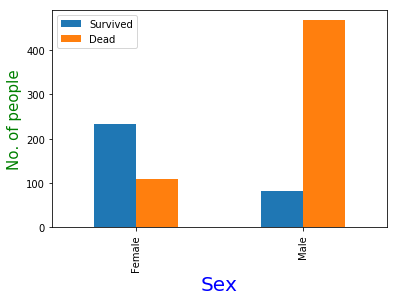

Percentage of male passengers survived is  15.0 %
Percentage of female passengers survived is  68.0 %
            S   C   Q
Survived  217  93  30
Dead      427  75  47


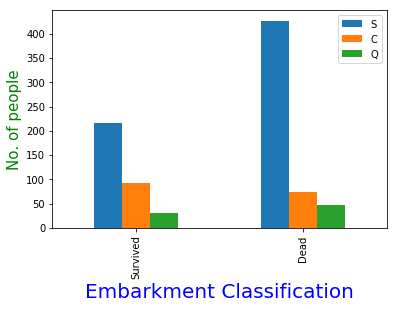

Percentage of Embark S that survived : 34.0 %
Percentage of Embark C that survived : 55.0 %
Percentage of Embark Q that survived : 39.0 %

      AgeGroup  Survived
0      Unknown  0.293785
1         Baby  0.704545
2        Child  0.360000
3     Teenager  0.428571
4      Student  0.347826
5  Young Adult  0.404545
6        Adult  0.400000
7       Senior  0.227273


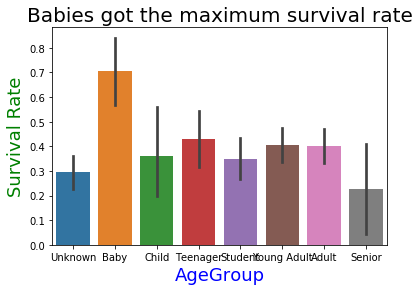

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


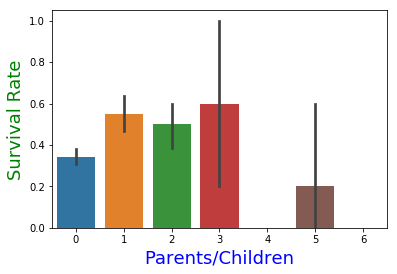

            Class  Survived
0  Economic Class  0.366950
1  Business Class  0.727273
2     First Class  0.777778


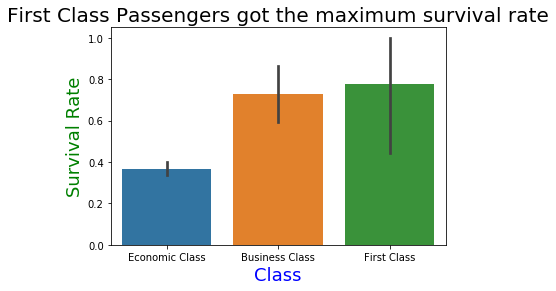

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   0.0      0   
6                            McCarthy, Mr. Timothy J    male  54

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('train.csv')

#Classification on the basis of class

survived_class = df[df['Survived']==1]['Pclass'].value_counts()
dead_class = df[df['Survived']==0]['Pclass'].value_counts()
df_class=pd.DataFrame([survived_class,dead_class])
df_class.index=['Survived','Dead']
df_class.columns=['Class 1','Class 2','Class 3']
print(df_class)
df_class.plot(kind='bar')
plt.ylabel('No. of people',size=15,color='green')
plt.xlabel('Survival',size=20,color='blue')
plt.show()
Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print('Percentage of Class1 passenger survived is ',round(Class1_survived),'%')
print('Percentage of Class2 passenger survived is ',round(Class2_survived),'%')
print('Percentage of Class3 passenger survived is ',round(Class3_survived),'%')

#Classification on the basis of the gender

survived_gender=df[df['Survived']==1]['Sex'].value_counts()
dead_gender=df[df['Survived']==0]['Sex'].value_counts()
df_gender=pd.DataFrame([survived_gender,dead_gender])
df_gender.columns=['Survived','Dead']
df_gender.index=['Female','Male']
print(df_gender)
df_gender.plot(kind='bar')
plt.ylabel('No. of people',size=15,color='green')
plt.xlabel('Sex',size=20,color='blue')
plt.show()
female_survived=df_gender.iloc[0,0]/df_gender.iloc[0,:].sum()*100
male_survived=df_gender.iloc[1,0]/df_gender.iloc[1,:].sum()*100
print('Percentage of male passengers survived is ',round(male_survived),'%')
print('Percentage of female passengers survived is ',round(female_survived),'%')

#Classififcation on the basis of embarkment

survived_embark=df[df['Survived']==1]['Embarked'].value_counts()
dead_embark=df[df['Survived']==0]['Embarked'].value_counts()
df_embark=pd.DataFrame([survived_embark,dead_embark])
df_embark.index=['Survived','Dead']
print(df_embark)
s_embark=df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
c_embark=df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
q_embark=df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
df_embark.plot(kind='bar')
plt.ylabel('No. of people',size=15,color='green')
plt.xlabel('Embarkment Classification',size=20,color='blue')
plt.show()
print('Percentage of Embark S that survived :',round(s_embark),'%')
print('Percentage of Embark C that survived :',round(c_embark),'%')
print('Percentage of Embark Q that survived :',round(q_embark),'%\n')

#Classification on the basis of Age
df["Age"] = df["Age"].fillna(0)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)
print(df[['AgeGroup','Survived']].groupby(['AgeGroup'],as_index=False).mean())
sns.barplot(x="AgeGroup",y="Survived",data=df)
plt.xlabel('AgeGroup',color='blue',size=18)
plt.ylabel('Survival Rate',color='green',size=18)
plt.title('Babies got the maximum survival rate',color='Black',size=20)
plt.show()


#Classification on the basis of Parch
print(df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True))
sns.barplot(x="Parch",y="Survived",data=df)
plt.xlabel('Parents/Children',color='blue',size=18)
plt.ylabel('Survival Rate',color='green',size=18)
plt.show()


#Classification on the basis of Fare
df['Fare']=df['Fare'].fillna(df['Age'].mean())
bins=[0,100,250,600]
labels=['Economic Class','Business Class','First Class']
df['Class']=pd.cut(df['Fare'],bins,labels=labels)
print(df[['Class','Survived']].groupby(['Class'],as_index=False).mean())
sns.barplot(x="Class",y="Survived",data=df)
plt.xlabel('Class',color='blue',size=18)
plt.ylabel('Survival Rate',color='green',size=18)
plt.title('First Class Passengers got the maximum survival rate',color='Black',size=20)
plt.show()
print(df.head(10))
